1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
- K-means Clustering - K-Means works by iteratively assigning each data point to the nearest of  centroids. The goal is to minimize the Within-Cluster Sum of Squares (WCSS).Mechanism: Initialize  points rightarrow Assign points to nearest centroid rightarrow Recalculate centroids based on mean rightarrow Repeat until convergence.Best For: Large datasets where you have a general idea of how many groups you need.

Hierarchical Clustering-This method (specifically Agglomerative) starts with every single data point as its own cluster and merges the closest pairs until only one cluster remains. The result is visualized using a Dendrogram.Mechanism: Calculate a distance matrix rightarrow Merge two closest points rightarrow Update matrix rightarrow Repeat.Best For: Smaller datasets where the underlying taxonomy or relationship between data points is important.

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- The Silhouette Score is a metric used to calculate the goodness of a clustering technique. While metrics like WCSS (Inertia) tell you how "tight" your clusters are, the Silhouette Score measures both cohesion (how close a point is to its own cluster) and separation (how far a point is from neighboring clusters).
It provides a way to assess if your data points are comfortably settled in their assigned groups or if they are "borderline" cases that might belong elsewhere.

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?
- Unlike K-Means, which requires you to guess the number of clusters, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds clusters based on the density of data points. It is governed by two critical parameters: Epsilon and MinPts.
-> Epsilon (epsilon)-Epsilon defines the maximum distance between two points for them to be considered neighbors. It essentially sets the "search radius" around any given point.
Small epsilon: If the radius is too small, most points will be labeled as "noise" (outliers) because they won't have enough neighbors. Large clusters may be split into many tiny ones.
Large epsilon: If the radius is too large, clusters will merge. Eventually, the entire dataset might be grouped into a single cluster, including the noise.

-> Minimum Samples (MinPts)- MinPts is the minimum number of points required to form a "dense region." A point is considered a Core Point only if it has at least MinPts (including itself) within its epsilon-radius.
Low MinPts (e.g., 1 or 2): The algorithm acts like Hierarchical Clustering; very sparse groups will be considered clusters.
High MinPts: The algorithm becomes more selective. It requires significant density to form a cluster, which is excellent for filtering out noise in "messy" data.

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- In clustering, feature scaling is the difference between a model that identifies meaningful patterns and one that is essentially "tricked" by the units of measurement.
Since both K-Means and DBSCAN rely on distance calculations (usually Euclidean distance) to determine similarity, the scale of your data directly dictates the results.

-> The Distance Distortion Problem:-
Most clustering algorithms calculate the distance between two points using the Pythagorean theorem (Euclidean distance)

-> Impact on Specific Algorithms:-
K-Means: Centroid Bias
K-Means tries to minimize the distance between points and their cluster centers (centroids).
- The issue: If features aren't scaled, the "spherical" clusters K-Means looks for will become elongated "cigars."

- The result: The centroids will move almost exclusively along the axis of the feature with the largest scale, leading to poor convergence and illogical groupings.

5. What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- The Elbow Method is a heuristic used to determine the optimal number of clusters  in K-Means clustering. Since K-Means requires you to specify  before running the algorithm, the Elbow Method provides a mathematical way to find the "sweet spot" where adding more clusters no longer significantly improves the model.
-> The Core Metric: Inertia (WCSS):-
To use the Elbow Method, you must first understand Inertia, also known as Within-Cluster Sum of Squares (WCSS).
Inertia measures how tightly packed the clusters are. It is calculated by summing the squared distances between each data point and its assigned cluster centroid:-
Low Inertia: Points are very close to their centroids (dense clusters).
High Inertia: Points are spread out far from their centroids (loose clusters).



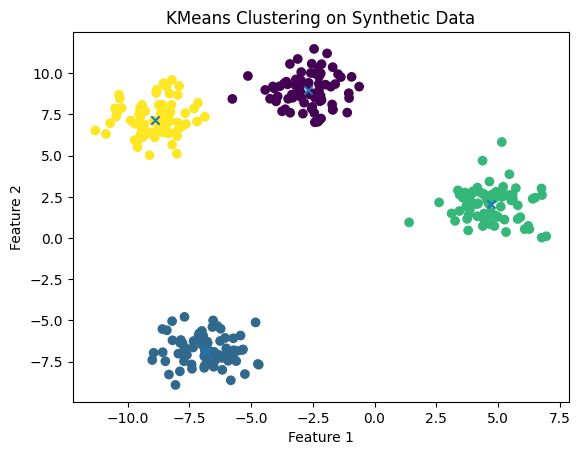

Cluster Centers:
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


In [1]:
#6 Generate synthetic data using make_blobs(n_samples=300, centers=4),apply KMeans clustering, and visualize the results with cluster centers.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=300, centers=4, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)


labels = kmeans.labels_
centers = kmeans.cluster_centers_


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
plt.title("KMeans Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


print("Cluster Centers:")
print(centers)



In [2]:
#7  Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np


wine = load_wine()
X = wine.data


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Number of clusters found (excluding noise):", num_clusters)


Number of clusters found (excluding noise): 0


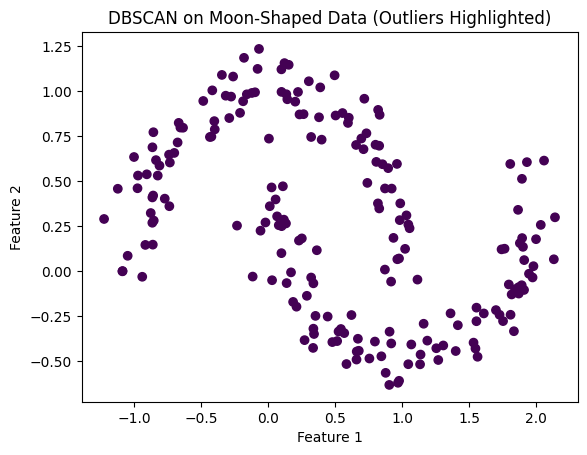

Number of clusters found (excluding noise): 1


In [3]:
#8 Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np


X, y = make_moons(n_samples=200, noise=0.1, random_state=42)


dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


outliers = labels == -1
clusters = labels != -1


plt.figure()
plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", num_clusters)



PCA Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Explained: 55.41%


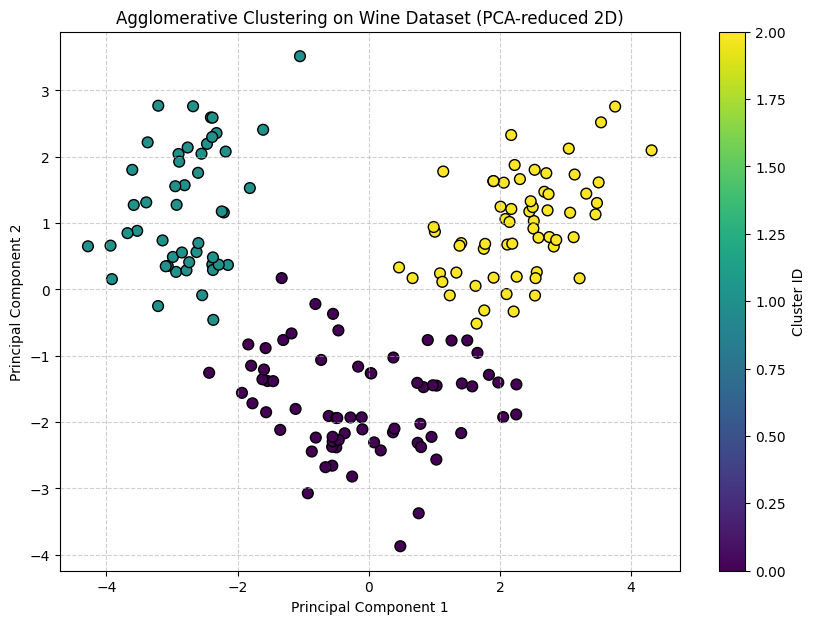

In [4]:
#9  Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


wine = load_wine()
X = wine.data


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X_pca)


plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=60)
plt.title('Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('wine_agglomerative_pca.png')


print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")


10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
- In a real-world e-commerce setting, customer segmentation is less about finding "perfect" shapes and more about finding actionable personas. Here is how I would structure the workflow as a data analyst.

1. Data Preprocessing:-
Before any modeling, the raw transactional data must be transformed into a Customer-Level Table.
-> Missing Values: I would check for missing demographic data (e.g., age, location). If the percentage is low.
-> Feature Engineering (RFM): I would calculate Recency (days since last purchase), Frequency (total orders), and Monetary value (total spend).

2. Choosing the Clustering Algorithm:-
I would likely use a combination of two approaches:
-> K-Means Clustering: This is the industry standard for large e-commerce datasets because it is computationally efficient and produces easy-to-interpret, spherical clusters.
-> DBSCAN (Density-Based Spatial Clustering of Applications with Noise): I would use this if the data has outliers (one-off extreme "whale" spenders) that I don't want to skew the averages of my main segments.

3. Determining the Number of Clusters:-
Since K-Means requires us to specify $k$ upfront, I would use two primary methods:
-> The Elbow Method: I’d plot the Within-Cluster Sum of Squares (WCSS) against different values of k.
-> Silhouette Analysis: I would calculate the Silhouette Score (ranging from -1 to 1) for various k values. A higher score means data points are well-matched to their own cluster and poorly matched to neighboring clusters.

Here is the python code of above question



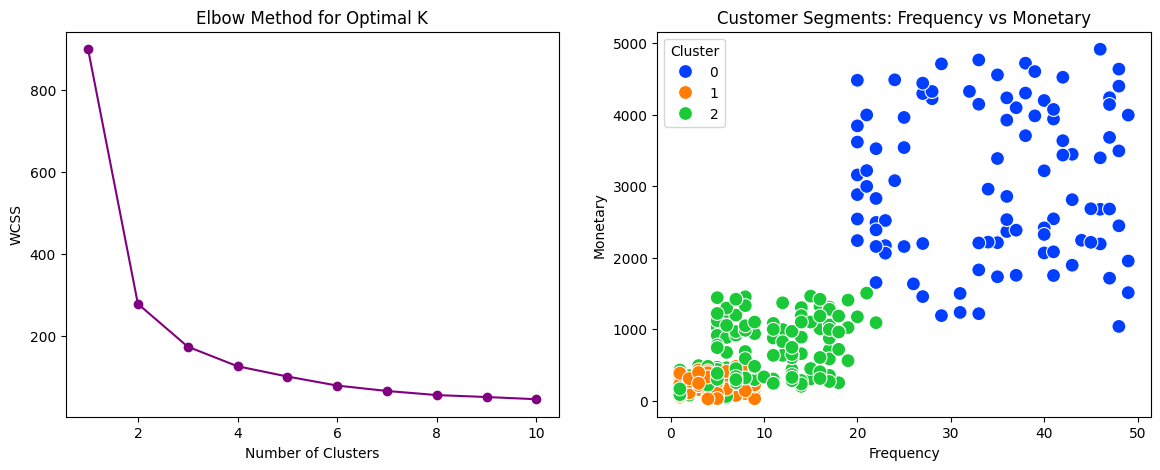

Segment Characteristics (Means):
         Recency  Frequency  Monetary
Cluster                              
0          15.51      34.70   3059.78
1         279.07       4.96    244.53
2         128.33      10.51    710.09


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
data_size = 300


data = {
    'Recency': np.concatenate([np.random.randint(0, 30, 100), np.random.randint(150, 365, 100), np.random.randint(30, 180, 100)]),
    'Frequency': np.concatenate([np.random.randint(20, 50, 100), np.random.randint(1, 10, 100), np.random.randint(5, 20, 100)]),
    'Monetary': np.concatenate([np.random.randint(1000, 5000, 100), np.random.randint(20, 500, 100), np.random.randint(200, 1500, 100)])
}
df = pd.DataFrame(data)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster', palette='bright', s=100)
plt.title('Customer Segments: Frequency vs Monetary')
plt.show()


print("Segment Characteristics (Means):")
print(df.groupby('Cluster').mean().round(2))